In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from extract_palette import get_palette_on_img

In [2]:
# Load all image and palette from the directory
image_dir = "movie_identification_dataset/movie_identification_dataset_filtered"
palette_dir = image_dir + "_palette"
text_dir = image_dir + "_text"

assert os.path.exists(image_dir), "Image directory not found"
assert os.path.exists(palette_dir), "Palette directory not found"
assert os.path.exists(text_dir), "Text directory not found"

image_files = os.listdir(image_dir)
palette_files = os.listdir(palette_dir)
text_files = os.listdir(text_dir)

print(f"Total images: {len(image_files)} and Total palettes: {len(palette_files)} and Total text: {len(text_files)}")

Total images: 120600 and Total palettes: 120600 and Total text: 120600


### Check if there is non overlap

In [3]:
# # Find the file that is not in the palette directory but in the image directory (without considering extension of file (split by dot))
image_files_set = [os.path.splitext(file)[0] for file in image_files]
palette_files_set = [os.path.splitext(file)[0] for file in palette_files]
text_files_set = [os.path.splitext(file)[0] for file in text_files]

image_files_set = set(image_files_set)
palette_files_set = set(palette_files_set)
text_files_set = set(text_files_set)

image_files_set - palette_files_set

set()

In [4]:
# Randomly Sample 10 images with its palette
sample_size = 10

# sampled_images = np.random.choice(image_files, sample_size, replace=False).tolist()
# sampled_palettes = [image[:-4] + ".npy" for image in sampled_images]
# sampled_texts = [image[:-4] + ".txt" for image in sampled_images]


sampled_images = [
    "1917 (2019)_0430.jpg",
    "Jojo Rabbit (2019)_0341.jpg",
    "La La Land (2016)_0445.jpg",
    "Everything Everywhere All At Once (2022)_0429.jpg",
    "Elemental (2023)_0400.jpg",
    "Interstellar (2014)_0448.jpg",
    "Spider Man 2 (2004)_0375.jpg",
    "Spirited Away (2001)_0327.jpg",
    "The Imitation Game (2014)_0389.jpg",
    "The Matrix (1999)_0400.jpg"
]
sampled_palettes = [image[:-4] + ".npy" for image in sampled_images]
sampled_texts = [image[:-4] + ".txt" for image in sampled_images]

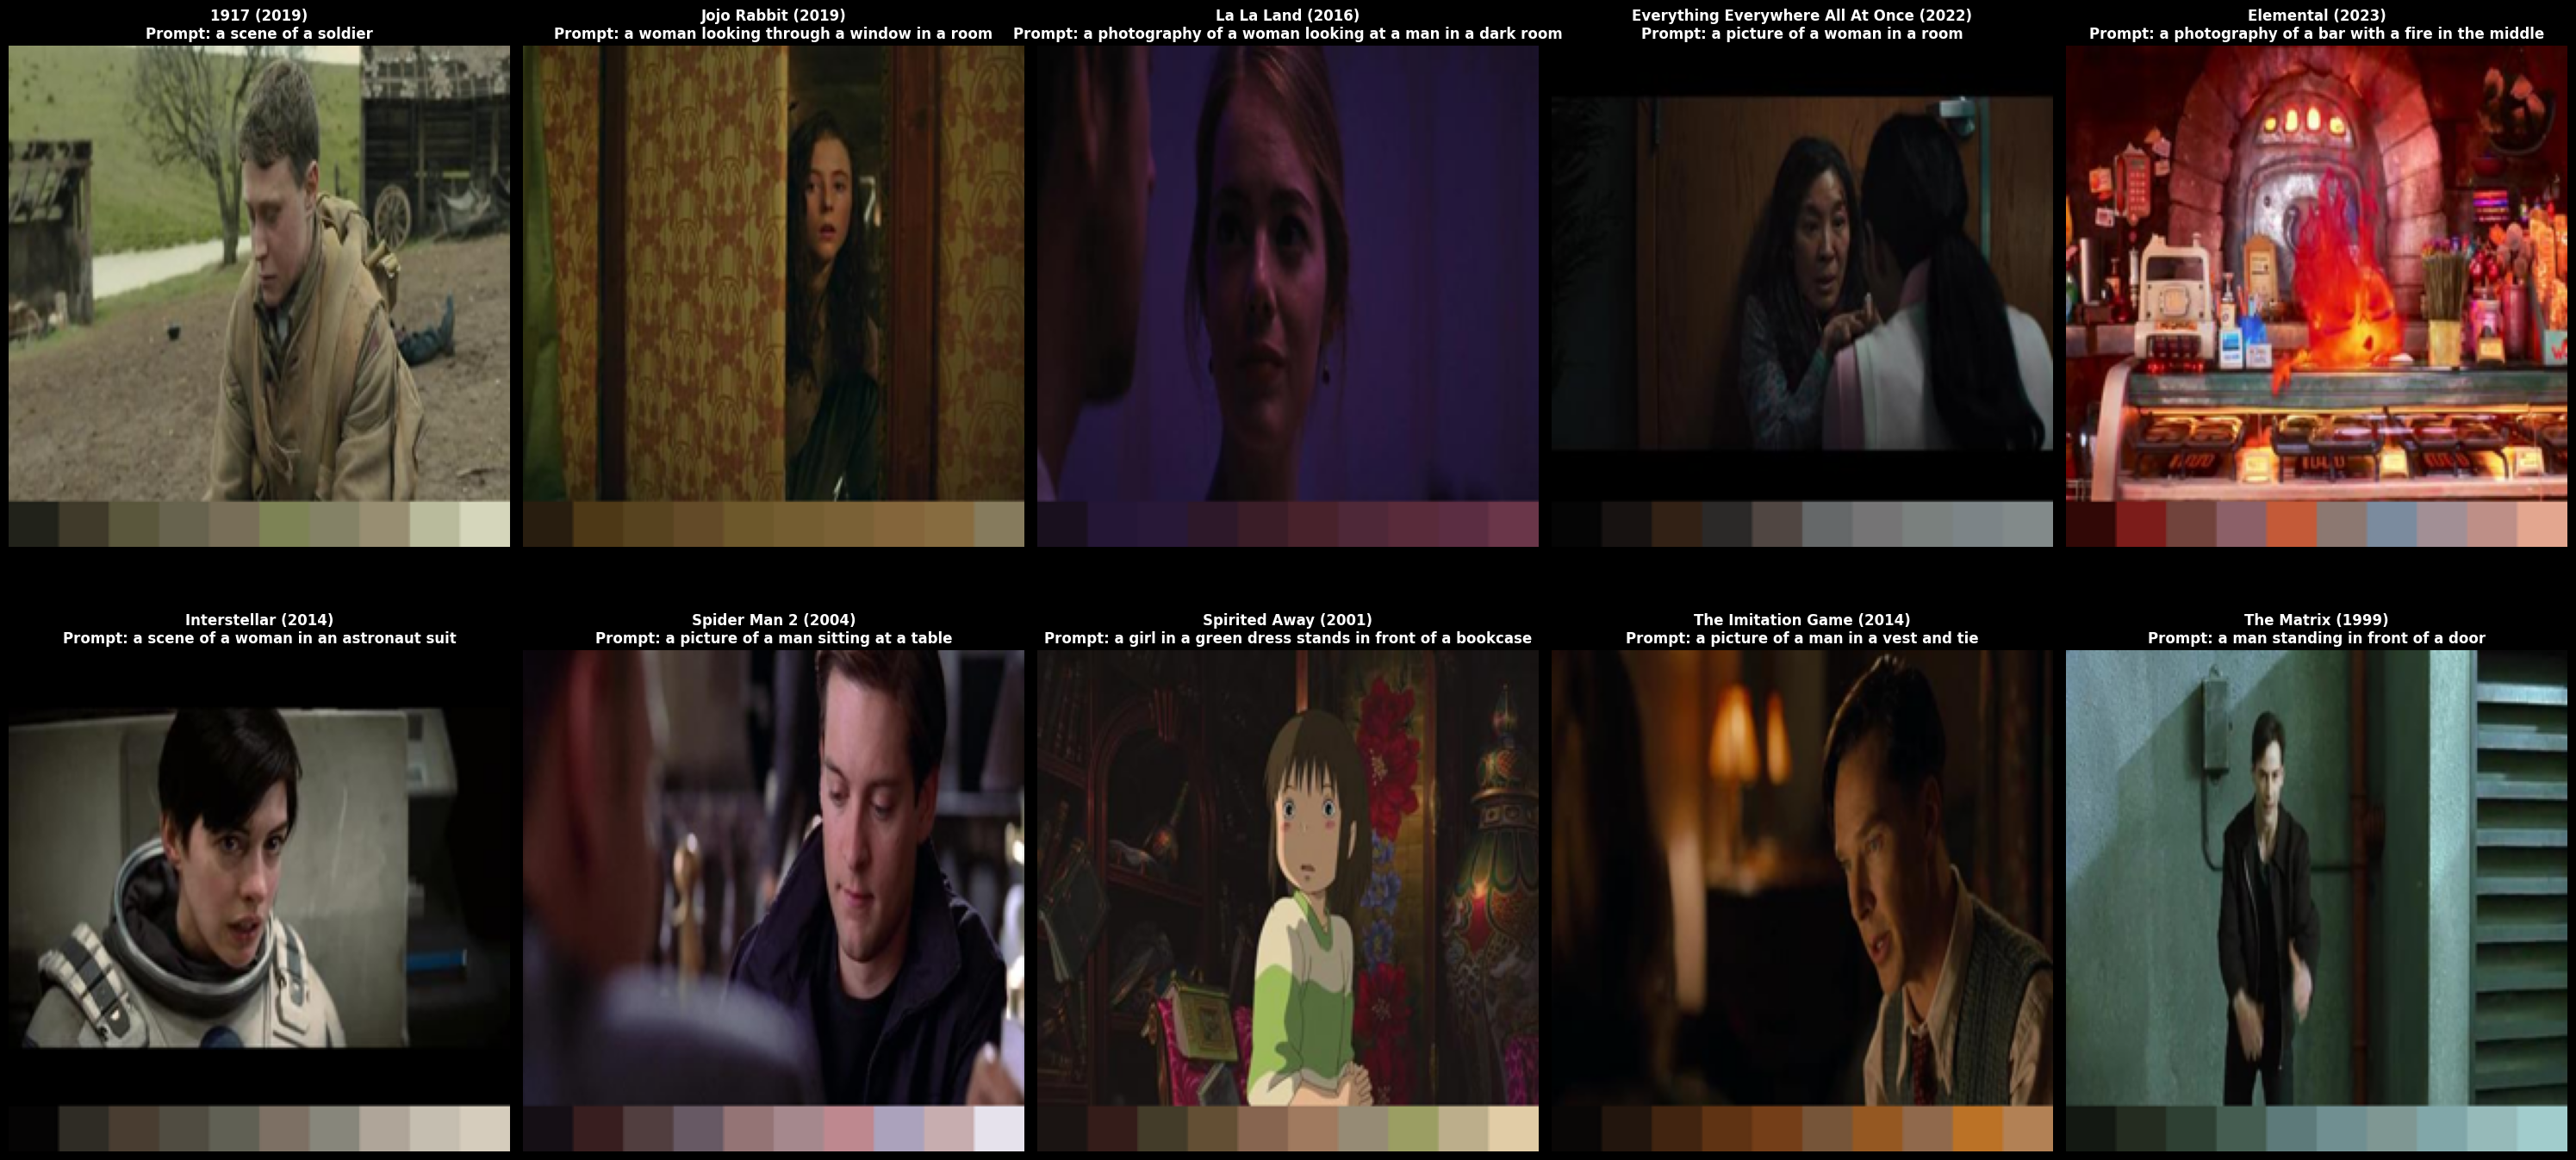

In [5]:
# make a one grid plot for all images
plt.style.use('dark_background')
image_per_col = 5
n_row = sample_size // image_per_col
n_col = sample_size // n_row
fig, ax = plt.subplots(n_row, n_col, figsize=(30, 15))

for i in range(sample_size):
    # Load image and palette
    image = Image.open(os.path.join(image_dir, sampled_images[i]))
    palette = np.load(os.path.join(palette_dir, sampled_palettes[i]))
    image_n_palette = get_palette_on_img(image, palette, size=(500, 500), output='', final_size=(256,256))

    # Plot image and palette
    ax[i // image_per_col, i % image_per_col].imshow(image_n_palette)
    ax[i // image_per_col, i % image_per_col].axis('off')
    
    # Load text and display it under the title
    with open(os.path.join(text_dir, sampled_texts[i]), 'r') as f:
        text = f.read()

    ax[i // image_per_col, i % image_per_col].set_title(sampled_images[i].split("_")[0] + "\n" + "Prompt: " + text, fontweight='bold', fontsize=12)


plt.tight_layout()
plt.show()